<a href="https://colab.research.google.com/github/walukas1/DeepDiveDSProjects/blob/main/Titanic_Mortality_Prediction_Walukas_v02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Titanic Mortaility Prediction

---
---
## Problem Definition


- What is the business problem?  Often some variant of saving time, saving money, and/or making money.
- What data science problem is this? ( supervised or unsupervised )
- If supervised ...
  - how did you determine what is the target? What is the target?
  - what statistical data type is the target: numerical or categorical?
  - would this be a classification or a regression problem?
- If unsupervised ...
  - what kind of clustering problem?



Titanic data analysis project is a supervised classification (predicting survive or not survive based on features such as , _, , and _.

Naive bayes classifiction
mortailty



---
---
## Data Collection/Sources

- where is the data source located: local file, database, website, API, other?
- where is the data dictionary?
- how many bytes ( KB, MB, GB, TB ) is the data set?
- what tools did/would you use to get and read the data?




---
###Import

In [ ]:
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns


plt.style.use('dark_background')

from sklearn import datasets, metrics, model_selection
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

---
###File Paths and Data Load

Source: ______
Converted csv to pandas data frame

In [ ]:
train_path = 'https://ddc-datascience.s3.amazonaws.com/Projects/Example/Data/Titanic.train.csv'
test_path = 'https://ddc-datascience.s3.amazonaws.com/Projects/Example/Data/Titanic.test.csv'

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

---
---
## Data Cleaning



- how can/did you discover how many rows?
- how can/did you discover how many columns?
- how can/did you discover if there are any **unique identifiers **and how would/did you handle them?
- how can/did you discover if there are any nulls and how would/did you handle them?
- if supervised, how can/did you discover if there are any nulls in your target and how would/did you handle them?
- how can/did you discover if there are any duplicates and how would/did you handle them?
- how can/did you discover if there are any missing values and how would/did you handle them?
- how can/did you discover if there are any nested fields and how would/did you handle them?





---
###Get to know your data frame


Use shape to find size of data frame.
This tells us that there are 891 rows and 12 columns

In [ ]:
train.shape

(891, 12)

Use .head() to see the first 5 rows of the data frame. This shows us what the frame looks like as well as the column titles.

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Next!
Check for nulls in each category to evaluate worth/usefullness of feature. From this check, we see that age, cabin, embarked are categories that are missing data. These features will be addressed in the data cleaning step.

In [ ]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Identify target and check for validity (no nulls)

In [ ]:
print(f'Target nulls: {train["Survived"].isnull().sum()}')

Target nulls: 0


Check for duplicate rows/entries in data frame

In [ ]:
print(f'Data frame duplicates: {train.duplicated().sum()}')

Data frame duplicates: 0


Check for unique values in each category (binaries get turned into 0 and 1s, equal rows and values are IDs)

In [ ]:
train.nunique().sort_values(ascending = False)

,0
PassengerId,891
Name,891
Ticket,681
Fare,248
Cabin,147
Age,88
SibSp,7
Parch,7
Pclass,3
Embarked,3


---
##Now clean up!

We will address age, cabin and embarked in this section then double check to make sure there are no nulls. <br/>
- Age - input mean age for nulls<br/>
- embarked - check mode and sub missing data  <br/>
- Cabin - delete cabin <br/>

No nulls but still drop <br/>
- Name
- Ticket
- PassengerID

Get dummy values for an categorical data (ticket class, sex, port)

First make a copy of your data frame before you edit it!

In [ ]:
train_clean = train.copy()
train_clean

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Age
Impute nulls with mean age

In [ ]:
mean_age = train["Age"].mean()
train_clean["Age"].fillna(mean_age, inplace = True)
print(f'Check for nulls in Age : {train_clean["Age"].isnull().sum()} nulls')

Check for nulls in Age : 0 nulls


<ipython-input-10-8ae320072813>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_clean["Age"].fillna(mean_age, inplace = True)


Clean null embraked values by replacing them with mode port value 'S'

In [ ]:
train_clean["Embarked"].unique() # What is in Embarked? 'S' 'Q' 'C'
train_clean["Embarked"].describe() #'S' is the mode
train_clean['Embarked'].value_counts()## How many of each to make sure its ok to replace all nulls with mode
##Majority is 'S'. Replace two nulls with S.
train_clean['Embarked'].fillna('S', inplace=True)
print(f'Check for nulls in Embarked : {train_clean["Embarked"].isnull().sum()} nulls')

Check for nulls in Embarked : 0 nulls


<ipython-input-11-3315c9242037>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_clean['Embarked'].fillna('S', inplace=True)


---
###Drop

cabin, name, pass id and ticket

In [ ]:
train_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
drop_columns = ['Cabin','Name','PassengerId','Ticket']
train_clean.drop(drop_columns, axis= 'columns', inplace=True)
train_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


---
###Seperate one - hot the classification data and rename features by split

Retrieve dummy variables with pandas get_dummies

In [ ]:
train_dummies = pd.get_dummies(
    train_clean,
    columns = ["Sex","Pclass","Embarked"],
    prefix=["Sex","Class","Port"]
)

train_dummies.drop('Sex_male', axis = 'columns', inplace = True)
train_dummies.head()

,Survived,Age,SibSp,Parch,Fare,Sex_female,Class_1,Class_2,Class_3,Port_C,Port_Q,Port_S
0,0,22.0,1,0,7.2500,False,False,False,True,False,False,True
1,1,38.0,1,0,71.2833,True,True,False,False,True,False,False
2,1,26.0,0,0,7.9250,True,False,False,True,False,False,True
3,1,35.0,1,0,53.1000,True,True,False,False,False,False,True
4,0,35.0,0,0,8.0500,False,False,False,True,False,False,True


---
---
## Exploratory Data Analysis



- if supervised, what data type is your target?  What does that suggest for the type of ML process you will use?
- what is the distribution of values for your target?     
  - 0 - 1 (dead or survived)
- how can/did you discover which fields are categorical?    
  - non-continuous numbers (BAYES analysis for these guys??)
- how can/did you discover which fields are numerical?
  - continuous numbers (describe() is fine here??)
- for each field, what is the distribution?
- how can/did you discover the relationship between any two variables?




In [ ]:
survived_df = train_dummies[train_dummies['Survived']== 1]
survived_df.describe()

,Survived,Age,SibSp,Parch,Fare
count,342.0,342.000000,342.000000,342.000000,342.000000
mean,1.0,28.549778,0.473684,0.464912,48.395408
std,0.0,13.772498,0.708688,0.771712,66.596998
min,1.0,0.420000,0.000000,0.000000,0.000000
25%,1.0,21.000000,0.000000,0.000000,12.475000
50%,1.0,29.699118,0.000000,0.000000,26.000000
75%,1.0,35.000000,1.000000,1.000000,57.000000
max,1.0,80.000000,4.000000,5.000000,512.329200


In [ ]:
deceased_df = train_dummies[train_dummies['Survived']== 0]
deceased_df.describe()

,Survived,Age,SibSp,Parch,Fare
count,549.0,549.000000,549.000000,549.000000,549.000000
mean,0.0,30.415100,0.553734,0.329690,22.117887
std,0.0,12.457370,1.288399,0.823166,31.388207
min,0.0,1.000000,0.000000,0.000000,0.000000
25%,0.0,23.000000,0.000000,0.000000,7.854200
50%,0.0,29.699118,0.000000,0.000000,10.500000
75%,0.0,35.000000,1.000000,0.000000,26.000000
max,0.0,74.000000,8.000000,6.000000,263.000000


<Axes: >

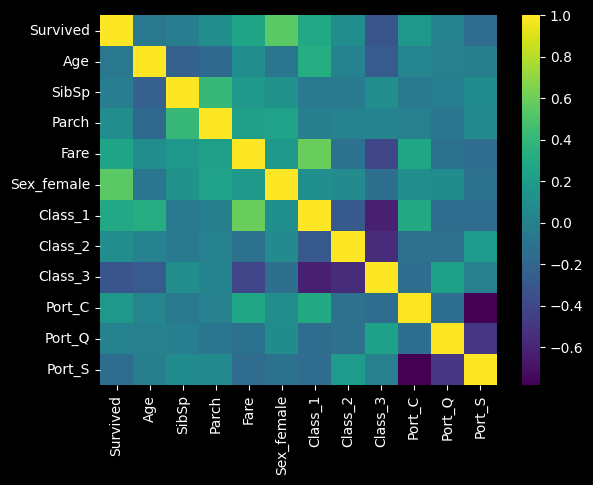

In [ ]:
corr = train_dummies.corr()
sns.heatmap(corr, cmap="viridis")

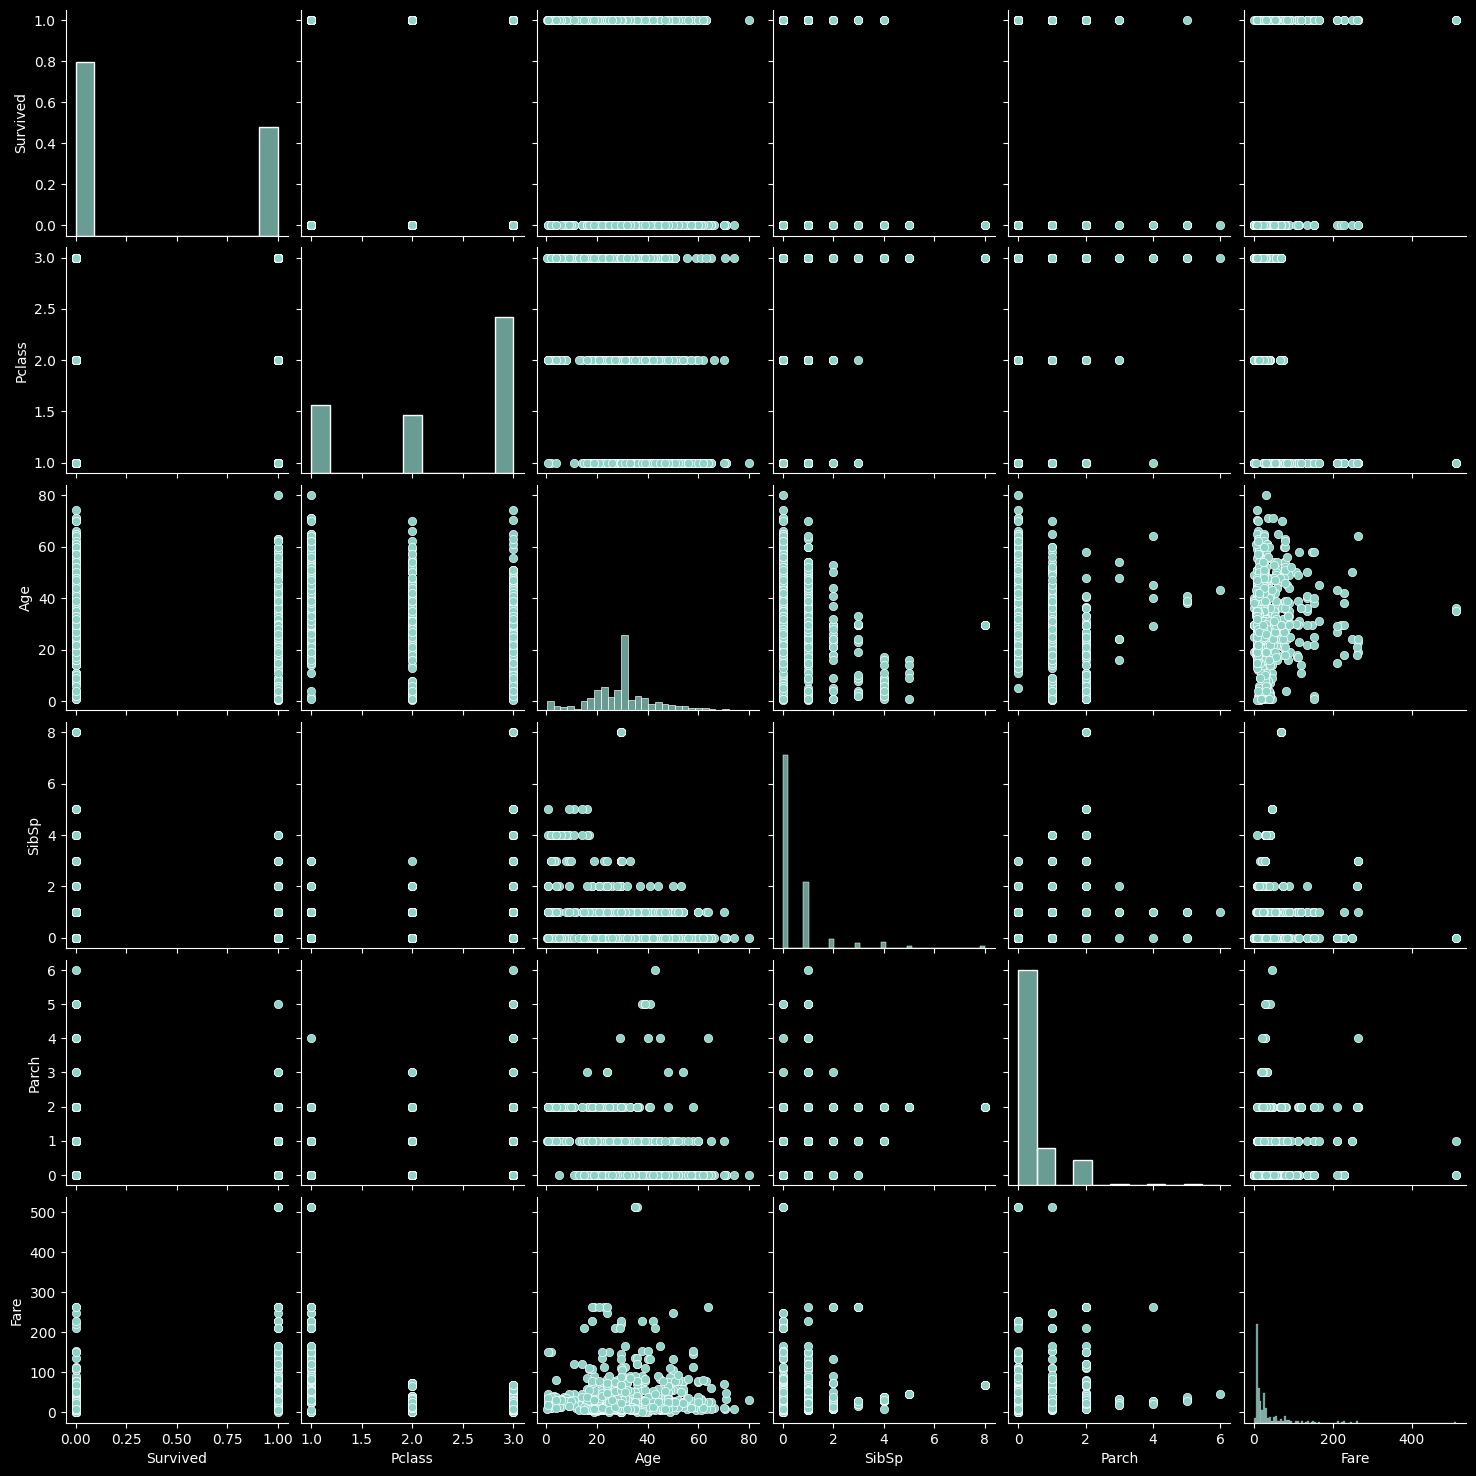

In [ ]:
sns.pairplot(train_clean)

Histograms

In [ ]:
train_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Histograms to show normal or non-normal distributions

Sex


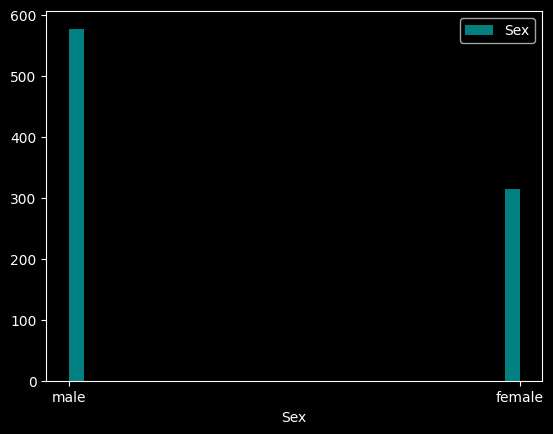

Age


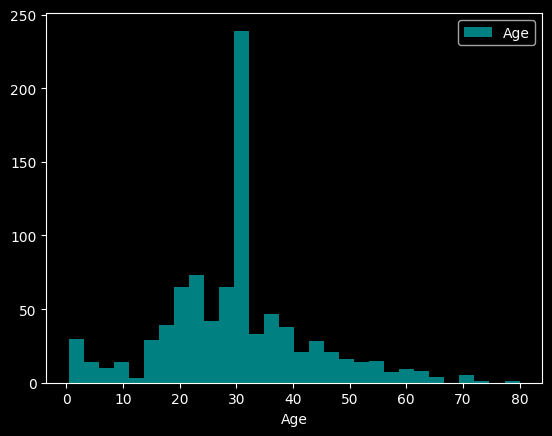

SibSp


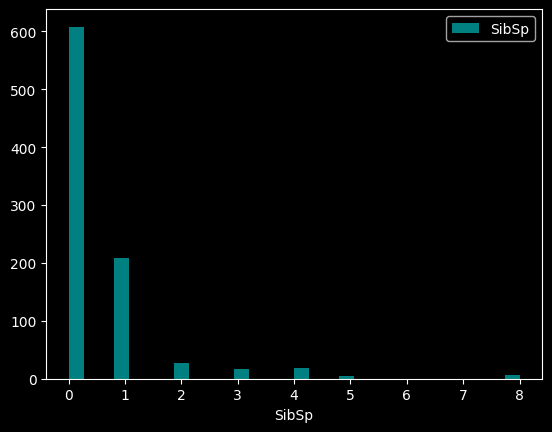

Parch


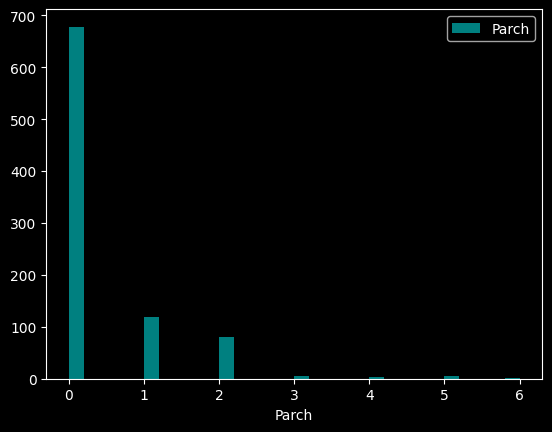

Fare


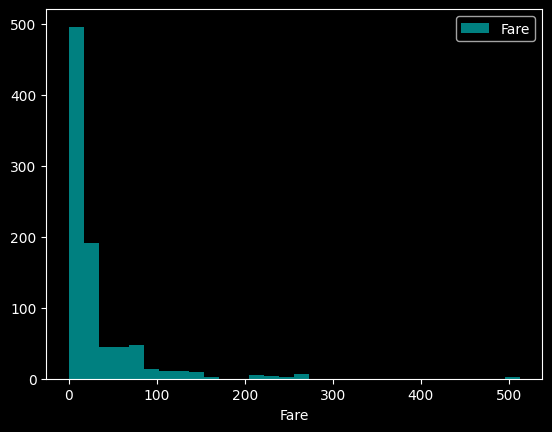

Embarked


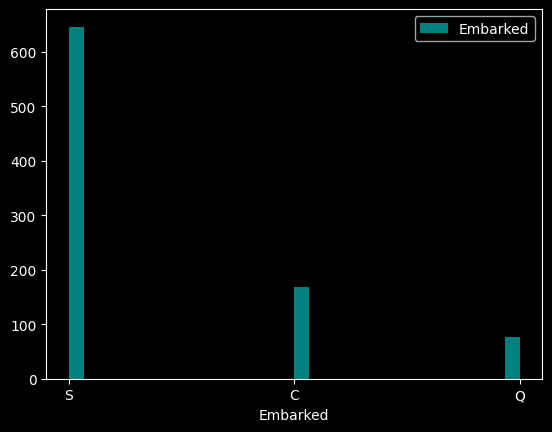

In [ ]:
for n in range(2,8):
  column_name = train_clean.columns[n]
  print(column_name)
  column = train_clean[column_name]
  column
  plt.hist(train_clean[column_name], color = 'teal', bins=30, label = column_name)
  plt.legend()
  plt.xlabel(column_name)
  plt.show()

---
---
## Processing



- what questions did you ask to determine which ML process to use?
- how did/can you determine what performance metric to use?  What others could you have used?  Which metrics might not be appropriate?
- how did/can you account for the variance/bias trade-off?









###GNB of Skewed Data
Define target(y) and training data (X) and model

In [ ]:
y = train_dummies['Survived'].copy()
X = train_dummies.drop('Survived', axis=1, inplace=False)

gnb = GaussianNB()

Single run of Gaussian Naive Bayes/cross validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
points = X_test.shape[0]
errors = (y_test != y_pred).sum()
print(f"Number of mislabeled points out of a total {points} points : {errors}")
print(f"Accuracy: {(1-(errors/points))*100:.1f}%")

Number of mislabeled points out of a total 179 points : 35
Accuracy: 80.4%


Confusion matrix for single GNB run

Text(0.5, 1.0, 'Confusion matrix')

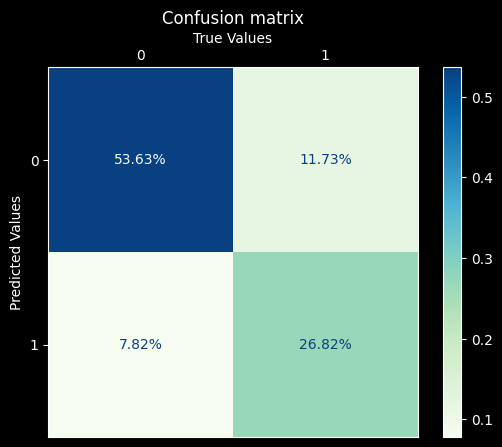

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(
  y_true = y_pred,
  y_pred = y_test,
  normalize = 'all',
  values_format = '.2%',
  cmap = 'GnBu',
)

plt.grid(False)
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.set_ticks_position('top')
plt.tick_params(axis='x', which='both', length=0)
plt.xlabel('True Values')
plt.ylabel("Predicted Values")
plt.title('Confusion matrix')

Loop GNB on skewed data set

In [ ]:
accuracy_scores = np.zeros(100)

for n in range(100):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = n)
  gnb.fit(X_train, y_train) #fit model
  y_split_pred = gnb.predict(X_test) #predict
  accuracy_scores[n] = metrics.accuracy_score(y_test, y_split_pred) #measure accuracy

accuracy_scores.mean()*100

76.98882681564247

##GNB on balanced data set

In [ ]:
print('survived:', survived_df.count().mean(), 'deceased:', deceased_df.count().mean())
balanced_deceased = deceased_df.sample(int(survived_df.count().mean()))
balanced_df = pd.concat([survived_df,balanced_deceased])
balanced_df.head()

survived: 342.0 deceased: 549.0


,Survived,Age,SibSp,Parch,Fare,Sex_female,Class_1,Class_2,Class_3,Port_C,Port_Q,Port_S
1,1,38.0,1,0,71.2833,True,True,False,False,True,False,False
2,1,26.0,0,0,7.9250,True,False,False,True,False,False,True
3,1,35.0,1,0,53.1000,True,True,False,False,False,False,True
8,1,27.0,0,2,11.1333,True,False,False,True,False,False,True
9,1,14.0,1,0,30.0708,True,False,True,False,True,False,False


In [ ]:
y_bal = balanced_df['Survived'].copy()
X_bal = balanced_df.drop('Survived', axis=1, inplace=False)

gnb = GaussianNB()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.20, random_state=0)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
points = X_test.shape[0]
errors = (y_test != y_pred).sum()
print(f"Number of mislabeled points out of a total {points} points : {errors}")
print(f"Accuracy: {(1-(errors/points))*100:.1f}%")

Number of mislabeled points out of a total 137 points : 37
Accuracy: 73.0%


Text(0.5, 1.0, 'Confusion matrix')

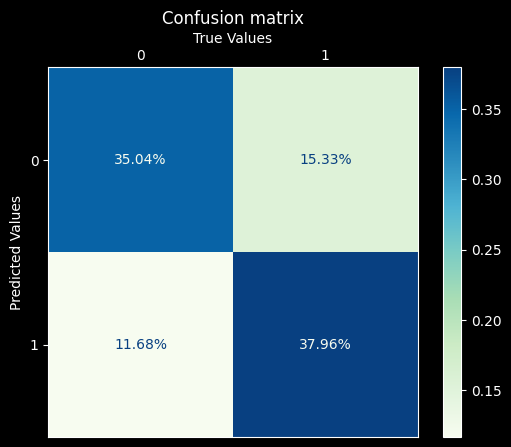

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(
  y_true = y_pred,
  y_pred = y_test,
  normalize = 'all',
  values_format = '.2%',
  cmap = 'GnBu',
)

plt.grid(False)
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.set_ticks_position('top')
plt.tick_params(axis='x', which='both', length=0)
plt.xlabel('True Values')
plt.ylabel("Predicted Values")
plt.title('Confusion matrix')

Loop Gaussian NB

In [ ]:
accuracy_scores = np.zeros(100)

for n in range(100):
  X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.20, random_state = n)
  gnb.fit(X_train, y_train) #fit model
  y_split_pred = gnb.predict(X_test) #predict
  accuracy_scores[n] = metrics.accuracy_score(y_test, y_split_pred) #measure accuracy

accuracy_scores.mean()*100

75.7956204379562

---
---
## Data Visualization/Communication of Results


- what plots did you use?  What did they show? What other visualizations could you have used?
- what could/should have been done to improve your performance metric?
- what constraints did you have while doing this project?  How could they be alleviated/mitigated?
- had you more resources, what else could you have done?
- what are your next steps?
